In [6]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy import stats
# import geopandas as gpd
# from shapely.geometry import Polygon
# import rasterio
# import xarray as xr
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import fiona
# import rasterio.mask
# from descartes import PolygonPatch
# from rasterio.plot import show
# from tqdm import tqdm
# import datetime
# import random
# from sklearn.preprocessing import StandardScaler
# import scipy.stats

In [7]:
mean_dek_ndvi_table = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/mean_dek_ndvi_table.csv', index_col = [0])

In [8]:
ndvi_table_origT = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/ndvi_table_origT.csv', index_col= [0])

In [9]:
mean_dek_ndvi_table

,2002-07-01,2002-07-11,2002-07-21,2002-08-01,2002-08-11,2002-08-21,2002-09-01,2002-09-11,2002-09-21,2002-10-01,...,2019-01-21,2019-02-01,2019-02-11,2019-02-21,2019-03-01,2019-03-11,2019-03-21,2019-04-01,2019-04-11,2019-04-21
0,0.093569,0.093548,0.093231,0.093482,0.093902,0.095308,0.095737,0.094952,0.094271,0.091093,...,0.089993,0.090922,0.091547,0.092245,0.092090,0.092054,0.092080,0.092534,0.093154,0.093862
1,0.094535,0.094518,0.094264,0.093765,0.093862,0.094512,0.095227,0.094836,0.094610,0.093392,...,0.090912,0.091895,0.092665,0.093321,0.093054,0.093177,0.093291,0.093818,0.094213,0.094327
2,0.095122,0.095095,0.094974,0.094281,0.094396,0.094807,0.095511,0.095086,0.094837,0.093881,...,0.091201,0.092223,0.093120,0.093688,0.093283,0.093645,0.094152,0.094746,0.095134,0.094910
3,0.094906,0.094849,0.094647,0.094075,0.093887,0.094402,0.095251,0.094900,0.094868,0.094094,...,0.090580,0.091573,0.092571,0.093365,0.093085,0.093651,0.094054,0.094543,0.094913,0.094734
4,0.095384,0.095278,0.095432,0.094983,0.094913,0.095234,0.095932,0.095231,0.095299,0.094623,...,0.091712,0.092508,0.093630,0.094373,0.093626,0.094272,0.094980,0.095534,0.095607,0.095372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ndvi_table_origT = (ndvi_table_origT-100)/100

In [11]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [12]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)
dekads = dekads.strftime("%Y-%m-%d").tolist()

In [13]:
ndvi_table_origT.columns = dekads

In [27]:
ndvi_table_origT

,2002-07-01,2002-07-11,2002-07-21,2002-08-01,2002-08-11,2002-08-21,2002-09-01,2002-09-11,2002-09-21,2002-10-01,...,2019-01-21,2019-02-01,2019-02-11,2019-02-21,2019-03-01,2019-03-11,2019-03-21,2019-04-01,2019-04-11,2019-04-21
0,0.095659,0.095168,0.093700,0.095405,0.095129,0.096133,0.096523,0.094676,0.092954,0.087422,...,0.091390,0.093647,0.092394,0.091535,0.094791,0.092024,0.093305,0.092528,0.092425,0.093018
1,0.096254,0.095741,0.093984,0.094987,0.094734,0.095624,0.096341,0.094194,0.094013,0.090318,...,0.090890,0.093912,0.095730,0.094346,0.094643,0.092596,0.092845,0.092276,0.092117,0.092221
2,0.096051,0.095856,0.094184,0.095052,0.094622,0.095341,0.096013,0.093443,0.093455,0.090354,...,0.090482,0.093687,0.098057,0.096802,0.094756,0.092340,0.093196,0.092053,0.092303,0.092216
3,0.096105,0.096176,0.094366,0.095133,0.094268,0.094989,0.096154,0.094638,0.094929,0.091745,...,0.089782,0.092512,0.097421,0.096556,0.095320,0.093426,0.094727,0.091789,0.093443,0.093311
4,0.097594,0.097368,0.096698,0.097357,0.097000,0.097519,0.097690,0.095452,0.095581,0.093334,...,0.090129,0.094535,0.097890,0.096124,0.093878,0.092701,0.093608,0.092475,0.092074,0.092106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ndvi_table = ndvi_table_origT.T.reset_index(drop=True)

In [57]:
#m_dek_ndvi_table = mean_dek_ndvi_table.T.reset_index(drop=True)

In [16]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv',index_col=[0])

In [17]:
lc_pixel_ids = lc_pixels_skill.pixel_id.tolist()

In [18]:
ndvi_table_lct = ndvi_table_origT.loc[lc_pixel_ids]

In [19]:
ndvi_table_lct.insert(0, 'lc', list(lc_pixels_skill.LC))

In [21]:
mean_dek_ndvi_table_lct = mean_dek_ndvi_table.loc[lc_pixel_ids]

In [22]:
mean_dek_ndvi_table_lct.insert(0, 'lc', list(lc_pixels_skill.LC))

In [ ]:
ndvi_table_lct_crop_rain = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_crop_rain = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1)

ndvi_table_lct_crop_irr = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'cropland_irrigated'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_crop_irr = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'cropland_irrigated'].drop(['lc'], axis = 1)

ndvi_table_lct_woodland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'woodland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_woodland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'woodland'].drop(['lc'], axis = 1)

ndvi_table_lct_shrubland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'shrubland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_shrubland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'shrubland'].drop(['lc'], axis = 1)

ndvi_table_lct_grassland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'grassland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_grassland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'grassland'].drop(['lc'], axis = 1)

In [113]:
seasonality_ndvi_crop_rain = (ndvi_table_lct_crop_rain).corrwith((mean_dek_ndvi_table_lct_crop_rain), axis = 1)

In [129]:
seasonality_ndvi_crop_irr = (ndvi_table_lct_crop_irr).corrwith((mean_dek_ndvi_table_lct_crop_irr), axis = 1)

In [122]:
seasonality_ndvi_woodland = (ndvi_table_lct_woodland).corrwith((mean_dek_ndvi_table_lct_woodland), axis = 1)

In [123]:
seasonality_ndvi_shrubland = (ndvi_table_lct_shrubland).corrwith((mean_dek_ndvi_table_lct_shrubland), axis = 1)

In [124]:
seasonality_ndvi_grassland = (ndvi_table_lct_grassland).corrwith((mean_dek_ndvi_table_lct_grassland), axis = 1)

In [151]:
seasonality_ndvi_crop_rain

3681      0.391365
41006     0.526155
51543     0.605284
52208     0.827348
53372     0.728647
            ...   
382709    0.926816
383868    0.883797
383942    0.925603
385086    0.906645
387421    0.940612
Length: 20820, dtype: float64

In [149]:
seasonality_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/seasonality/'

In [154]:
seasonality_ndvi_crop_rain.to_csv(seasonality_dir + 'seasonality_ndvi_crop_rain.csv', header = True)

In [153]:
seasonality_ndvi_crop_irr.to_csv(seasonality_dir + 'seasonality_ndvi_crop_irr.csv', header = True)

In [155]:
seasonality_ndvi_woodland.to_csv(seasonality_dir + 'seasonality_ndvi_woodland.csv', header = True)

In [156]:
seasonality_ndvi_grassland.to_csv(seasonality_dir + 'seasonality_ndvi_grassland.csv', header = True)

In [157]:
seasonality_ndvi_shrubland.to_csv(seasonality_dir + 'seasonality_ndvi_shrubland.csv', header = True)

In [125]:
crop_rain_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_rainfed']['skill']
crop_irr_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_irrigated']['skill']
woodland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'woodland']['skill']
shrubland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'shrubland']['skill']
grassland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'grassland']['skill']

In [138]:
seasonality_ndvi_crop_irr

2518      0.443214
3098      0.398386
5427      0.306517
13579     0.796158
14158     0.909555
            ...   
368110    0.923161
368111    0.862059
368694    0.900061
376971    0.933055
377555    0.881450
Length: 2589, dtype: float64

In [135]:
print(stats.pearsonr(seasonality_ndvi_woodland, woodland_skill))
print(stats.pearsonr(seasonality_ndvi_crop_irr, crop_irr_skill))
print(stats.pearsonr(seasonality_ndvi_crop_rain, crop_rain_skill))
print(stats.pearsonr(seasonality_ndvi_grassland, grassland_skill))
print(stats.pearsonr(seasonality_ndvi_shrubland, shrubland_skill))

(0.8613049521387207, 0.0)
(0.8967541818600498, 0.0)
(0.8826102117272262, 0.0)
(0.8952358304438613, 0.0)
(0.8855136266657007, 0.0)


(0.0, 1.0, 0.0, 1.0)

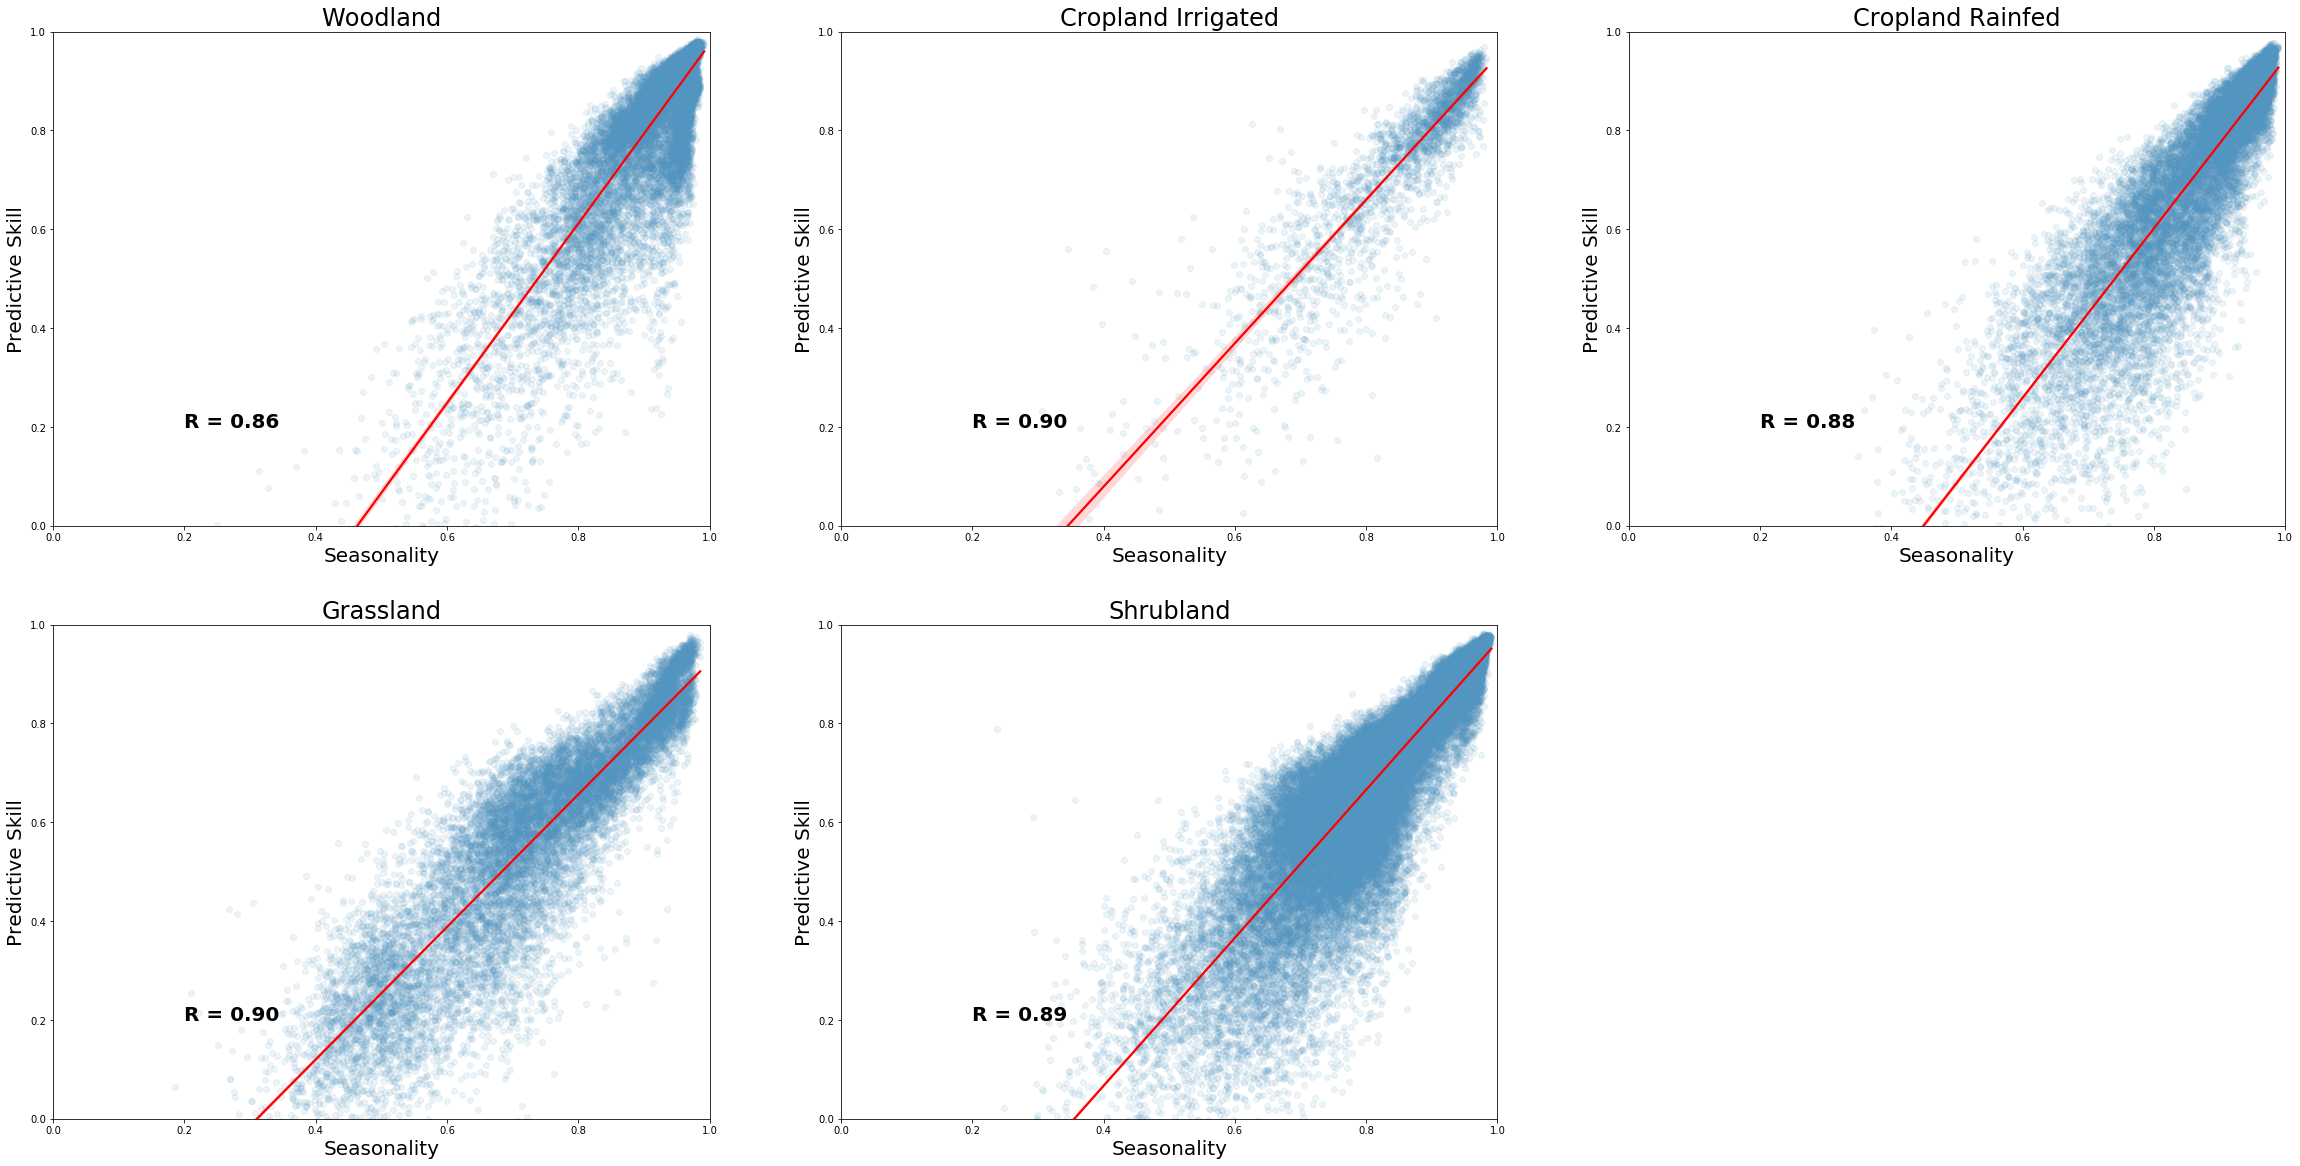

In [137]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (40,20))
sns.regplot(seasonality_ndvi_woodland, woodland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax1)
ax1.set_xlabel('Seasonality', fontsize = 20)
ax1.set_ylabel('Predictive Skill', fontsize = 20)
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.text(0.2, 0.2, "R = 0.86", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax1.set_title('Woodland', fontsize = 24)
sns.regplot(seasonality_ndvi_crop_irr, crop_irr_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax2)
ax2.set_xlabel('Seasonality', fontsize = 20)
ax2.set_ylabel('Predictive Skill', fontsize = 20)
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.text(0.2, 0.2, "R = 0.90", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax2.set_title('Cropland Irrigated', fontsize = 24)
sns.regplot(seasonality_ndvi_crop_rain, crop_rain_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax3)
ax3.set_xlabel('Seasonality', fontsize = 20)
ax3.set_ylabel('Predictive Skill', fontsize = 20)
ax3.set_xlim([0,1])
ax3.set_ylim([0,1])
ax3.text(0.2, 0.2, "R = 0.88", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax3.set_title('Cropland Rainfed', fontsize = 24)
sns.regplot(seasonality_ndvi_grassland, grassland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax4)
ax4.set_xlabel('Seasonality', fontsize = 20)
ax4.set_ylabel('Predictive Skill', fontsize = 20)
ax4.set_xlim([0,1])
ax4.set_ylim([0,1])
ax4.text(0.2, 0.2, "R = 0.90", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax4.set_title('Grassland', fontsize = 24)
sns.regplot(seasonality_ndvi_shrubland, shrubland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax5)
ax5.set_xlabel('Seasonality', fontsize = 20)
ax5.set_ylabel('Predictive Skill', fontsize = 20)
ax5.set_xlim([0,1])
ax5.set_ylim([0,1])
ax5.text(0.2, 0.2, "R = 0.89", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax5.set_title('Shrubland', fontsize = 24)
ax6.axis('off')

# Contour plot: PI, seasonality, PS

In [144]:
transposed_predictions_tables = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/predictions_tables/'

In [ ]:
ndvi_ea_simplex_ed6_pi1T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi1T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi2T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi2T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi3T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi3T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi4T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi4T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi5T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi5T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi6T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi6T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi7T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi7T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi8T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi8T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi9T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi9T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi10T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi10T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi11T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi11T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])
ndvi_ea_simplex_ed6_pi12T = pd.read_csv(transposed_predictions_tables + 'ndvi_ea_simplex_ed6_pi12T.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [1]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv')

NameError: name 'pd' is not defined